# Stock's Data Feature Importance (Classification)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2020-01-01'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2014-01-02,3.95,3.95,3.98,3.84,3.85,20548400
2014-01-03,4.00,4.00,4.00,3.88,3.98,22887200
2014-01-06,4.13,4.13,4.18,3.99,4.01,42398300
2014-01-07,4.18,4.18,4.25,4.11,4.19,42932100
2014-01-08,4.18,4.18,4.26,4.14,4.23,30678700


In [3]:
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()

In [4]:
dataset.head()

,Adj Close,Close,High,Low,Open,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,
2014-01-03,4.00,4.00,4.00,3.88,3.98,22887200,1,1,1,0.012658
2014-01-06,4.13,4.13,4.18,3.99,4.01,42398300,1,1,1,0.032500
2014-01-07,4.18,4.18,4.25,4.11,4.19,42932100,0,1,0,0.012106
2014-01-08,4.18,4.18,4.26,4.14,4.23,30678700,0,0,0,0.000000
2014-01-09,4.09,4.09,4.23,4.05,4.20,30667600,0,0,1,-0.021531


In [5]:
dataset.shape

(1509, 10)

In [6]:
X = dataset[['Open', 'High', 'Low','Adj Close', 'Volume', 'Buy_Sell_on_Open', 'Buy_Sell', 'Returns']]
y = dataset['Increase_Decrease']

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Create decision tree classifer object
clf = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = clf.fit(X, y)

In [8]:
# Calculate feature importances
importances = model.feature_importances_

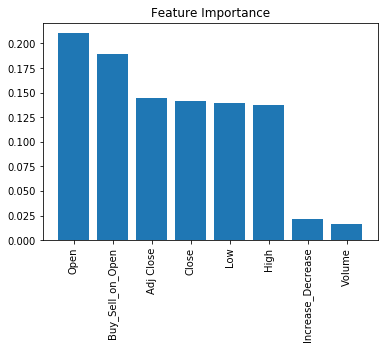

In [9]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [dataset.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()